# Intro to Linear Algebra

This topic, *Intro to Linear Algebra*, is the first in the *Machine Learning Foundations* series. 

It is essential because linear algebra lies at the heart of most machine learning approaches and is especially predominant in deep learning, the branch of ML at the forefront of today’s artificial intelligence advances. Through the measured exposition of theory paired with interactive examples, you’ll develop an understanding of how linear algebra is used to solve for unknown values in high-dimensional spaces, thereby enabling machines to recognize patterns and make predictions. 

The content covered in *Intro to Linear Algebra* is itself foundational for all the other topics in the Machine Learning Foundations series and it is especially relevant to *Linear Algebra II*.

*Segment 1: Data Structures for Algebra*

* What Linear Algebra Is  
* A Brief History of Algebra 
* Tensors 
* Scalars 
* Vectors and Vector Transposition
* Norms and Unit Vectors
* Basis, Orthogonal, and Orthonormal Vectors
* Arrays in NumPy  
* Matrices 
* Tensors in TensorFlow and PyTorch

*Segment 2: Common Tensor Operations* 

* Tensor Transposition
* Basic Tensor Arithmetic
* Reduction
* The Dot Product
* Solving Linear Systems

*Segment 3: Matrix Properties*

* The Frobenius Norm
* Matrix Multiplication
* Symmetric and Identity Matrices
* Matrix Inversion
* Diagonal Matrices
* Orthogonal Matrices

## Segment 1: Data Structures for Algebra

**Slides used to begin segment, with focus on introducing what linear algebra is, including hands-on paper and pencil exercises.**

### What Linear Algebra Is

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
t = np.linspace(0, 40, 1000) 
t.size

1000

Distance travelled by robber: $d = 2.5t$

In [11]:
d_r = 2.5 * t
d_r.size

1000

Distance travelled by sheriff: $d = 3(t-5)$

In [12]:
d_s = 3* (t-5)
d_s.size

1000

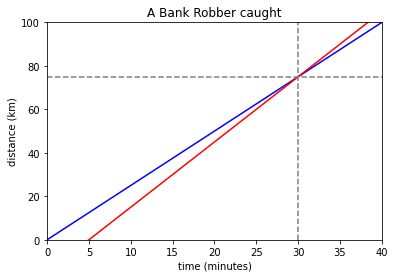

In [13]:
fig, ax = plt.subplots()
plt.title("A Bank Robber caught")
plt.xlabel("time (minutes)")
plt.ylabel("distance (km)")
ax.set_xlim([0,40])
ax.set_ylim([0,100])
ax.plot(t, d_r, c='blue')
ax.plot(t, d_s, c='red')
plt.axvline(x=30, color='grey', linestyle='--')
_ = plt.axhline(y=75, color='grey', linestyle='--')

### Scalars (Rank 0 Tensors) in Base Python

In [14]:
x = 25
x

25

In [15]:
type(x) # if we'd like more specificity (e.g., int16, uint8), we need NumPy or another numeric library

int

In [16]:
y = 25.4
y

25.4

In [17]:
type(y)

float

### Scalars in TensorFlow (version 2.0 or later)

Tensors created with a wrapper, all of which [you can read about here](https://www.tensorflow.org/guide/tensor):  

* `tf.Variable`
* `tf.constant`
* `tf.placeholder`
* `tf.SparseTensor`

Most widely-used is `tf.Variable`, which we'll use here. 

As with TF tensors, in PyTorch we can similarly perform operations, and we can easily convert to and from NumPy arrays

Also, a full list of tensor data types is available [here](https://www.tensorflow.org/api_docs/python/tf/dtypes/DType).

In [18]:
import tensorflow as tf

In [19]:
x_tf = tf.Variable(25, dtype=tf.int16)
x_tf

<tf.Variable 'Variable:0' shape=() dtype=int16, numpy=25>

In [20]:
x_tf.shape

TensorShape([])

In [21]:
y_tf = tf.Variable(3, dtype=tf.int16)
y_tf

<tf.Variable 'Variable:0' shape=() dtype=int16, numpy=3>

In [22]:
x_tf + y_tf

<tf.Tensor: shape=(), dtype=int16, numpy=28>

In [23]:
tf_sum = tf.add(x_tf, y_tf)
tf_sum

<tf.Tensor: shape=(), dtype=int16, numpy=28>

In [24]:
type(tf_sum.numpy()) # note that NumPy operations automatically convert tensors to NumPy arrays, and vice versa

numpy.int16

In [17]:
tf_float = tf.Variable(25., dtype=tf.float16)
tf_float

<tf.Variable 'Variable:0' shape=() dtype=float16, numpy=25.0>

### Vectors (Rank 1 Tensors) in NumPy

In [18]:
x = np.array([25,2, 5])
x

array([25,  2,  5])

In [19]:
len(x)

3

In [20]:
x.shape

(3,)

In [21]:
x[1]

2

In [22]:
type(x[1])

numpy.int32

### Vector Transposition

In [23]:
x_t = x.T
x_t

array([25,  2,  5])

In [24]:
x_t.shape

(3,)

In [25]:
y = np.array([[25, 2, 5]])
y

array([[25,  2,  5]])

In [26]:
y.shape

(1, 3)

In [27]:
y_t = y.T
y_t

array([[25],
       [ 2],
       [ 5]])

In [28]:
y_t.shape

(3, 1)

### Zero Vectors

Have no effect if added to another vector

In [29]:
z = np.zeros(3)
z

array([0., 0., 0.])

### Vectors in TensorFlow

In [30]:
x_t = tf.Variable([25, 2, 5])
x_t

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([25,  2,  5])>

### $L^{2}$ Norm

In [31]:
x

array([25,  2,  5])

In [32]:
(5**2)

25

In [33]:
np.linalg.norm(x)

25.573423705088842

### $L^{1}$ Norm

In [34]:
x

array([25,  2,  5])

In [35]:
np.abs(5)

5

### Squared $L^{2}$ Norm

In [36]:
(x[2]**2)

25

In [37]:
np.dot(x[2], x[2])

25

### Max Norm

In [38]:
x

array([25,  2,  5])

In [39]:
np.max(x)

25

### Orthogonal Vectors

In [40]:
i = np.array([1,0])
i

array([1, 0])

In [41]:
j = np.array([0,1])
j

array([0, 1])

In [42]:
np.dot(i, j)

0

### Matrices (Rank 2 Tensors) in NumPy

In [43]:
X = np.array([[25,2], [5,26], [3,7]])
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [44]:
X.shape

(3, 2)

In [45]:
x.size

3

In [46]:
X[:,0]

array([25,  5,  3])

In [47]:
X[1,:]

array([ 5, 26])

In [48]:
X[0:2, 0:2]

array([[25,  2],
       [ 5, 26]])

## Matrices in TensorFlow

In [49]:
X_tf = tf.Variable([[25,2],[5,26], [3,7]])
X_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[25,  2],
       [ 5, 26],
       [ 3,  7]])>

In [50]:
tf.rank(X_tf)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [51]:
tf.shape(X_tf)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 2])>

In [52]:
X_tf[1,:]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 5, 26])>

## Segment 2: Common Tensor Operations

### Tensor Transposition

In [53]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [54]:
X.T

array([[25,  5,  3],
       [ 2, 26,  7]])

In [55]:
tf.transpose(X_tf)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[25,  5,  3],
       [ 2, 26,  7]])>

### Basic Arithmetical Properties

In [56]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [57]:
X*2

array([[50,  4],
       [10, 52],
       [ 6, 14]])

In [58]:
X+2

array([[27,  4],
       [ 7, 28],
       [ 5,  9]])

In [59]:
X+2*2

array([[29,  6],
       [ 9, 30],
       [ 7, 11]])

In [60]:
X*2+2

array([[52,  6],
       [12, 54],
       [ 8, 16]])

In [61]:
X_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[25,  2],
       [ 5, 26],
       [ 3,  7]])>

In [62]:
X_tf*2+2

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]])>

In [63]:
tf.add(tf.multiply(X_tf,2),2)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]])>

In [64]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [65]:
A = X+2
A

array([[27,  4],
       [ 7, 28],
       [ 5,  9]])

In [66]:
A * X

array([[675,   8],
       [ 35, 728],
       [ 15,  63]])

In [67]:
A_tf = X_tf + 2

In [68]:
A_tf + X_tf

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]])>

In [69]:
A_tf * X_tf

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[675,   8],
       [ 35, 728],
       [ 15,  63]])>

### Reduction

In [70]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [71]:
X_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[25,  2],
       [ 5, 26],
       [ 3,  7]])>

In [72]:
X.sum()

68

In [73]:
tf.reduce_sum(X_tf)

<tf.Tensor: shape=(), dtype=int32, numpy=68>

In [74]:
X.sum(axis=1)

array([27, 31, 10])

In [75]:
X.sum(axis=0)

array([33, 35])

In [76]:
tf.reduce_sum(X_tf, 1)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([27, 31, 10])>

In [77]:
tf.reduce_sum(X_tf, 0)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([33, 35])>

### The Dot Product

In [78]:
x

array([25,  2,  5])

In [79]:
y = np.array([0,1,2])
y

array([0, 1, 2])

In [80]:
25*0 + 2*1 + 5*2

12

In [81]:
np.dot(x,y)

12

In [82]:
x_tf =  tf.Variable([25,  2,  5])
x_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([25,  2,  5])>

In [83]:
y_tf = tf.Variable([0, 1, 2])
y_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([0, 1, 2])>

In [84]:
tf.reduce_sum(tf.multiply(x_tf, y_tf))

<tf.Tensor: shape=(), dtype=int32, numpy=12>

### Solving Linear Systems

In the **Substitution** example, the two equations in the system are: 
$$ y = 3x $$
$$ -5x + 2y = 2 $$

The second equation can be rearranged to isolate $y$: 
$$ 2y = 2 + 5x $$
$$ y = \frac{2 + 5x}{2} = 1 + \frac{5x}{2} $$

In [85]:
x = np.linspace(-10, 10, 1000)

In [86]:
y1 = 3 * x

In [87]:
y2 = 1 + (5*x)/2

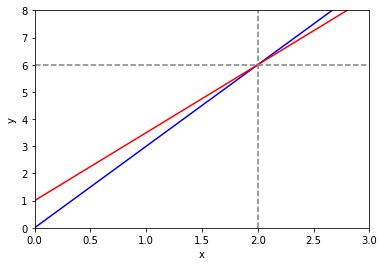

In [88]:
fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')
ax.set_xlim([0,3])
ax.set_ylim([0,8])
ax.plot(x, y1, c='blue')
ax.plot(x, y2, c='red')
plt.axvline(x=2, color='grey', linestyle='--')
_ = plt.axhline(y=6, color='grey', linestyle='--')

In the **Elimination** example, the two equations in the system are:
$$ 2x - 3y = 15 $$
$$ 4x + 10y = 14 $$

Both equations can be rearranged to isolate $y$. Starting with the first equation: 
$$ -3y = 15 - 2x $$
$$ y = \frac{15 - 2x}{-3} = -5 + \frac{2x}{3} $$

Then for the second equation: 
$$ 4x + 10y = 14 $$
$$ 2x + 5y = 7 $$
$$ 5y = 7 - 2x $$
$$ y = \frac{7 - 2x}{5} $$

In [89]:
y1 = -5 + (2*x)/3

In [90]:
y2 = (7-2*x)/5

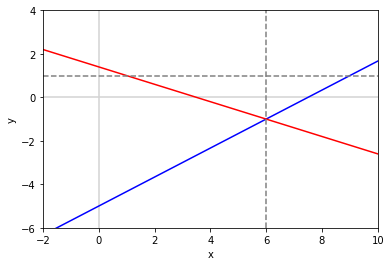

In [91]:
fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('y')

plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

ax.set_xlim([-2, 10])
ax.set_ylim([-6, 4])
ax.plot(x, y1, c='blue')
ax.plot(x, y2, c='red')
plt.axvline(x=6, color='grey', linestyle='--')
plt.axhline(y=1, color='grey', linestyle='--')

## Segment 3: Matrix Properties

### Frobenius Norm

1. Analogous to $L^{2}$ norm of vector
2. Measure the size of matrix in terms of Euclidean distance
3. It

In [92]:
X = np.array([[1,2],[3,4]])
X

array([[1, 2],
       [3, 4]])

In [93]:
(1**2 + 2**2 + 3**2 + 4**2)**(1/2)

5.477225575051661

In [94]:
np.linalg.norm(x)

182.75685139933898

In [95]:
x_tf = tf.Variable([[1, 2],[3, 4.]])

In [96]:
# tf.norm() only supports floats only
tf.norm(x_tf)

<tf.Tensor: shape=(), dtype=float32, numpy=5.477226>

### Matrix Multiplication (With a Vector)

In [97]:
A = np.array([[3,4], [5, 6],[7,8]])
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [98]:
b = np.array([1, 2])
b

array([1, 2])

In [99]:
np.dot(A, b)

array([11, 17, 23])

In [100]:
A_tf =tf.Variable([[3,4], [5,6], [7,8]])
A_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[3, 4],
       [5, 6],
       [7, 8]])>

In [101]:
b_tf = tf.Variable([1, 2])
b_tf

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([1, 2])>

In [102]:
tf.linalg.matvec(A_tf, b_tf)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([11, 17, 23])>

### Matrix Multiplication (with Two Matrices)

In [103]:
A = np.array([[3,4],[5,6],[7,8]])
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [104]:
b = np.array([1,2])
b

array([1, 2])

In [105]:
np.dot(A,b)

array([11, 17, 23])

In [106]:
A_tf = tf.Variable([[3,4], [5,6], [7,8]])
A_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[3, 4],
       [5, 6],
       [7, 8]])>

In [107]:
b_tf = tf.Variable([1,2])
b_tf

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([1, 2])>

In [108]:
tf.linalg.matvec(A_tf, b_tf)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([11, 17, 23])>

### Matrix Multiplication (with Two Matrices)

In [109]:
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [110]:
B = np.array([[1,9], [2,0]])
B

array([[1, 9],
       [2, 0]])

In [111]:
np.dot(A, B)

array([[11, 27],
       [17, 45],
       [23, 63]])

In [112]:
np.dot(A, B)

array([[11, 27],
       [17, 45],
       [23, 63]])

Note that matrix multiplication is not "commutative" (i.e., $AB \neq BA$) so uncommenting the following line will throw a size mismatch error:

In [113]:
B_tf = tf.convert_to_tensor(B, dtype=tf.int32)
B_tf

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 9],
       [2, 0]])>

In [114]:
tf.matmul(A_tf, B_tf)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[11, 27],
       [17, 45],
       [23, 63]])>

### Symmetric Matrices

In [115]:
x_sym = np.array([[0, 1, 2], [1, 7, 8], [2, 8, 9]])
x_sym

array([[0, 1, 2],
       [1, 7, 8],
       [2, 8, 9]])

In [116]:
x_sym.T

array([[0, 1, 2],
       [1, 7, 8],
       [2, 8, 9]])

In [117]:
x_sym.T == x_sym

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

### Identity Matrices

In [118]:
I = tf.Variable([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
I

<tf.Variable 'Variable:0' shape=(3, 3) dtype=int32, numpy=
array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])>

In [119]:
x_tf = tf.Variable([25, 3, 5])
x_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([25,  3,  5])>

In [173]:
tf.linalg.matmul(I, X_tf)


<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[25,  2],
       [ 5, 26],
       [ 3,  7]])>

### Answers to Matrix Multiplication Qs

In [125]:
M_q = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
M_q

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [126]:
V_q = np.array([[-1, 1, -2], [0, 1, 2]]).T
V_q

array([[-1,  0],
       [ 1,  1],
       [-2,  2]])

In [127]:
np.matmul(M_q, V_q)

array([[ -3,   5],
       [ -9,  14],
       [-15,  23]])

### Matrix Inversion

In [129]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [130]:
Xinv = np.linalg.inv(X)
Xinv

array([[ 1.5,  1. ],
       [-2.5, -2. ]])

As a quick aside, let's prove that $X^{-1}X = I_n$ as per the slides: 

In [132]:
np.dot(Xinv, X)

array([[1.0000000e+00, 4.4408921e-16],
       [0.0000000e+00, 1.0000000e+00]])

In [133]:
y = np.array([4,-7])
y

array([ 4, -7])

In [134]:
w = np.dot(Xinv, y)
w

array([-1.,  4.])

Show that $y = Xw$: 

In [135]:
np.dot(X, w)

array([ 4., -7.])

**Geometric Visualization**

Recalling from the slides that the two equations in the system are:
$$ 4b + 2c = 4 $$
$$ -5b - 3c = -7 $$

Both equations can be rearranged to isolate a variable, say $c$. Starting with the first equation: 
$$ 4b + 2c = 4 $$
$$ 2b + c = 2 $$
$$ c = 2 - 2b $$

Then for the second equation: 
$$ -5b - 3c = -7 $$
$$ -3c = -7 + 5b $$
$$ c = \frac{-7 + 5b}{-3} = \frac{7 - 5b}{3} $$

In [137]:
b = np.linspace(-10, 10, 1000) # start, finish, and points

In [138]:
c1 = 2-2*b

In [139]:
c2 = (7-5*b)/3

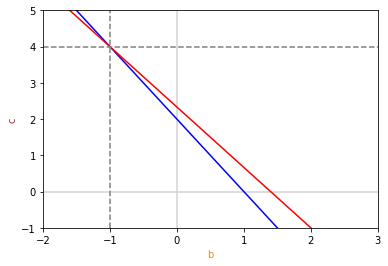

In [149]:
fix, ax = plt.subplots()
plt.xlabel('b', c='darkorange')
plt.ylabel('c', c='brown')

plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

ax.set_xlim([-2, 3])
ax.set_ylim([-1, 5])
ax.plot(b, c1, c='blue')
ax.plot(b, c2, c='red')

plt.axvline(x=-1, color='gray', linestyle='--')
_ = plt.axhline(y=4, color='gray', linestyle='--')

In TensorFlow :

In [150]:
tf.linalg.inv(tf.Variable([[4, 2], [-5, -3.]])) # also float

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1.4999998,  0.9999998],
       [-2.4999995, -1.9999996]], dtype=float32)>

### Orthogonal Matrices

These are the solutions to Exercises 3 and 4 on **orthogonal matrices** from the slides.

For Exercise 3, to demonstrate the matrix $I_3$ has mutually orthogonal columns, we show that the dot product of any pair of columns is zero: 

In [152]:
I = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
I

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [153]:
column_1 = I[:, 0]
column_1

array([1, 0, 0])

In [160]:
column_2 = I[:, 1]
column_2

array([0, 1, 0])

In [155]:
column_3 = I[:, 2]
column_3

array([0, 0, 1])

In [161]:
np.dot(column_1, column_2)

0

In [162]:
np.dot(column_1, column_3)

0

In [163]:
np.dot(column_2, column_3)

0

We can use the `np.linalg.norm()` method from earlier in the notebook to demonstrate that each column of $I_3$ has unit norm: 

In [164]:
np.linalg.norm(column_1)

1.0

In [165]:
np.linalg.norm(column_2)

1.0

In [166]:
np.linalg.norm(column_3)

1.0

Since the matrix $I_3$ has mutually orthogonal columns and each column has unit norm, the column vectors of $I_3$ are *orthonormal*. Since $I_3^T = I_3$, this means that the *rows* of $I_3$ must also be orthonormal. 

Since the columns and rows of $I_3$ are orthonormal, $I_3$ is an *orthogonal matrix*.

For Exercise 4, let's repeat the steps of Exercise 3 with matrix *K* instead of $I_3$. We could use NumPy again, but for fun I'll use TensorFlow instead.

In [167]:
K = tf.Variable([[2/3, 1/3, 2/3], [-2/3, 2/3, 1/3], [1/3, 2/3, -2/3]])
K

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[ 0.6666667 ,  0.33333334,  0.6666667 ],
       [-0.6666667 ,  0.6666667 ,  0.33333334],
       [ 0.33333334,  0.6666667 , -0.6666667 ]], dtype=float32)>

In [169]:
Kcol_1 = K[:, 0]
Kcol_1

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.6666667 , -0.6666667 ,  0.33333334], dtype=float32)>

In [170]:
Kcol_2 = K[:, 1]
Kcol_2

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.33333334, 0.6666667 , 0.6666667 ], dtype=float32)>

In [171]:
Kcol_3 = K[:, 2]
Kcol_3

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.6666667 ,  0.33333334, -0.6666667 ], dtype=float32)>

In [174]:
tf.linalg.tensordot(Kcol_1, Kcol_2, axes=1)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [175]:
tf.linalg.tensordot(Kcol_1, Kcol_3, axes=1)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [176]:
tf.linalg.tensordot(Kcol_2, Kcol_3, axes=1)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

We've now determined that the columns of $K$ are orthogonal.

In [177]:
tf.norm(Kcol_1)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [178]:
tf.norm(Kcol_2)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [179]:
tf.norm(Kcol_3)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

We've now determined that, in addition to being orthogonal, the columns of $K$ have unit norm, therefore they are orthonormal. 

To ensure that $K$ is an orthogonal matrix, we would need to show that not only does it have orthonormal columns but it has orthonormal rows are as well. Since $K^T \neq K$, we can't prove this quite as straightforwardly as we did with $I_3$. 

One approach would be to repeat the steps we used to determine that $K$ has orthogonal columns with all of the matrix's rows (please feel free to do so). Alternatively, we can use an orthogonal matrix-specific equation from the slides, $A^TA = I$, to demonstrate that $K$ is orthogonal in a single line of code: 

In [181]:
K = np.array([[2/3, 1/3, 2/3], [-2/3, 2/3, 1/3], [1/3, 2/3, -2/3]])

In [183]:
np.matmul(K.T, K)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Notwithstanding rounding errors that we can safely ignore, this confirms that $K^TK = I$ and therefore $K$ is an orthogonal matrix.